In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv

%matplotlib inline

from tyssue import History, HistoryHdf5
from tyssue.draw import sheet_view
from tyssue.io import get_sim_dir

In [2]:
sim_dir  = get_sim_dir()/"test_contractility_speed/"

sim_file = sim_dir/"1.005_constriction_0_radialtension.hf5"

history = HistoryHdf5.from_archive(sim_file)

from tyssue.draw import browse_history

In [10]:
specs = {
    "edge":{
        'color':'lightslategrey',
        'visible':True
    },
    "face":{
        'color': lambda sheet : sheet.face_df["apoptosis"],
        'colormap':'Reds',
        'visible':True
    }
}

browse_history(history, coords=['z', 'x', 'y'], **specs)

/home/guillaume/miniconda3/envs/tyssue/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


interactive(children=(IntSlider(value=0, description='i', max=600), Output()), _dom_classes=('widget-interact'…

In [6]:
from tyssue.draw import create_gif
from IPython.display import Image

In [7]:
create_gif(
    history,
    "small.gif",
    num_frames=60,
    margin=2,
    coords=['z', 'x'], 
    vert={"visible": False},
    edge={"head_width": 0})

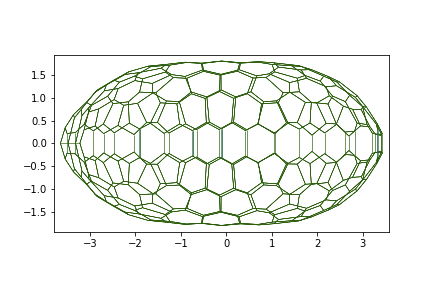

In [8]:
Image("small.gif")

In [7]:
from tyssue.generation import three_faces_sheet
from tyssue import Sheet

In [8]:
def get_next(eptm):
    """
    Returns the indices of the next edge for each edge
    """
    fs_indexed = (
        eptm.edge_df[["face", "srce"]]
        .reset_index()
        .set_index(["face", "srce"], drop=False)
    )
    ft_index = pd.MultiIndex.from_frame(
        eptm.edge_df[["face", "trgt"]], names=["face", "srce"]
    )
    next_ = fs_indexed.loc[ft_index, "edge"].values
    return next_



sheet = Sheet("emin", *three_faces_sheet())
next_ = get_next(sheet)


In [9]:
next_

array([ 1,  2,  3,  4,  5,  0,  7,  8,  9, 10, 11,  6, 13, 14, 15, 16, 17,
       12])